# Etapa 01 - Importação e Exploração Inicial da Base

In [6]:
#Importando pandas, numpy, seaborn e matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Carregando a base de dados
df_salarios = pd.read_csv('salario_profissionais_dados.csv')

In [8]:
#Explorando a base de dados
df_salarios.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [9]:
#Explorando os formatos e já analisando possíveis valores nulos
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [10]:
#Utilizando a função .describe() para explorar superficialmente as estatísticas da base
df_salarios.describe()

,work_year,salary_in_usd,years_of_experience
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,5.970972
std,0.691448,63055.625278,2.062673
min,2020.000000,5132.000000,1.000000
25%,2022.000000,95000.000000,5.000000
50%,2022.000000,135000.000000,6.000000
75%,2023.000000,175000.000000,8.000000
max,2023.000000,450000.000000,10.000000


**# Fim da Etapa 01 "Importação e Exploração Inicial da Base"**



*   Incialmente já aproveitei para importar todas as bibliotecas de possível utilização durante este desafio.
*   Após a importação das bibliotecas carreguei os dados, que já estavam pré-carregados aqui no colab.
*   Comecei a análise observando as 5 primeiras linhas da base de dados, fazendo isso já pude ter uma noção de como os dados estão organizados, suas colunas e respectivos tipos de dados.
*   Após, fiz duas análises que julgo importantes antes de proceder, uma utilizando a função .info(), onde pude analisar e confirmar as colunas e os tipos de dados delas, bem como o número de linhas. Também já aproveitei e observei que nenhuma coluna tem dados nulos, uma vez que, todas as colunas apresataram 3755 valores não nulos.
*   Por fim, para a segunda análise utilizei a função .describe() para já fazer uma pré-análise estatística das variáves quantitativas da base de dados.
*   Apesar de nas instruções indicar as funções .shape() para observar o formato do dataset e .isnull() para verificar valores nulos, creio que as análises feita acima tornaram as tornaram desnecessárias para a minha análise, e como em uma empresa, prezaria pela máxima eficência do meu código resolvi não as colocar.









# Etapa 02 - Frequência e Distribuição das Categorias

In [11]:
#Criando a variável com os cargos, e posteriormente selecionando os 10 mais comuns
cargos = df_salarios['job_title'].value_counts()
cargos_mais_comuns = cargos.head(10)
cargos_mais_comuns

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
Data Architect,101
Research Scientist,82
Applied Scientist,58
Data Science Manager,58


In [12]:
df_salarios['job_title'].value_counts(normalize=True)*100

,proportion
job_title,
Data Engineer,27.696405
Data Scientist,22.370173
Data Analyst,16.298269
Machine Learning Engineer,7.696405
Analytics Engineer,2.743009
...,...
Principal Data Architect,0.026631
Head of Machine Learning,0.026631
Cloud Data Architect,0.026631


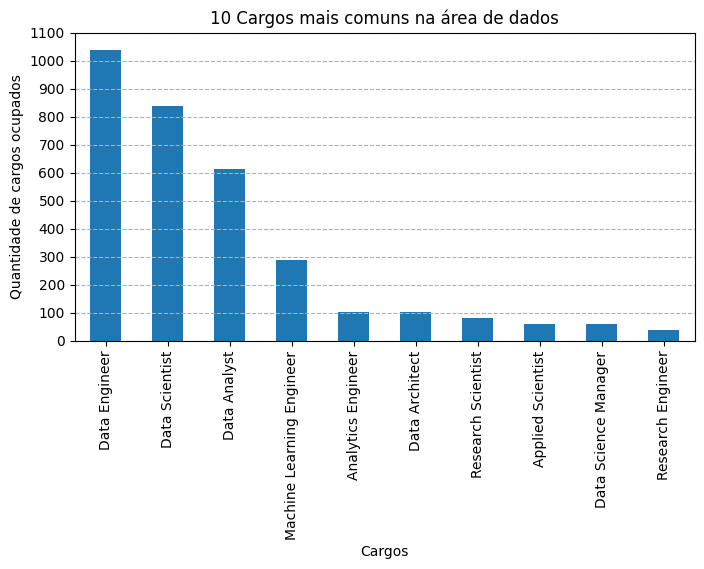

In [13]:
#Criando um gráfico para melhor visualizar os 10 cargos mais comuns
cargos_mais_comuns.plot(kind='bar', figsize=(8,4))
plt.title("10 Cargos mais comuns na área de dados")
plt.xlabel("Cargos")
plt.ylabel("Quantidade de cargos ocupados")
plt.yticks(range(0, 1040 + 100, 100))
plt.grid(axis='y', linestyle = '--')
plt.show()

In [14]:
#Analisando os níveis de experiência
experiencia = df_salarios['experience_level'].value_counts()
experiencia

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


In [15]:
df_salarios['experience_level'].value_counts(normalize=True)*100

,proportion
experience_level,
SE,67.003995
MI,21.438083
EN,8.521971
EX,3.035952


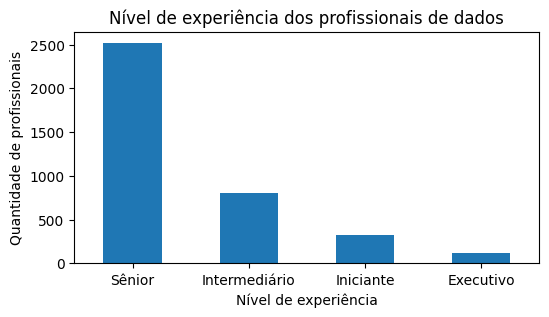

In [16]:
#Criando um gráfico para melhor visualizar o nivel de experiência
experiencia.plot(kind='bar', figsize=(6,3))
plt.title("Nível de experiência dos profissionais de dados")
plt.xlabel("Nível de experiência")
plt.ylabel("Quantidade de profissionais")
plt.xticks(range(4), ['Sênior', 'Intermediário', 'Iniciante', 'Executivo'], rotation=0)
plt.show()

In [17]:
#Analisando o tamanho das Companhias
empresa = df_salarios['company_size'].value_counts()
empresa

,count
company_size,
M,3153
L,454
S,148


In [18]:
#Analisando o tamanho de maneira proporcional
empresa_proporcional = round(df_salarios['company_size'].value_counts(normalize=True)*100,2)
empresa_proporcional

,proportion
company_size,
M,83.97
L,12.09
S,3.94


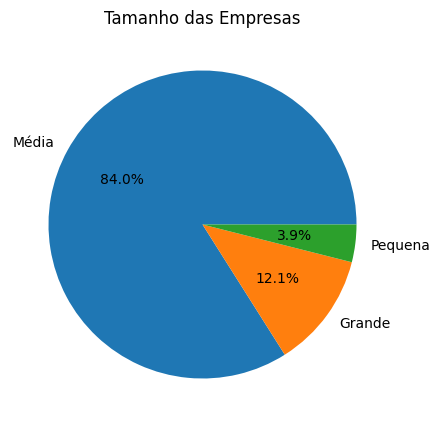

In [19]:
#Criando o polêmico gráfico pizza para analisar as empresas
rotulo = ['Média', 'Grande', 'Pequena']
empresa_proporcional.plot.pie(autopct="%.1f%%", labels=rotulo, figsize=(5,5))
plt.title("Tamanho das Empresas")
plt.ylabel("")
plt.show()

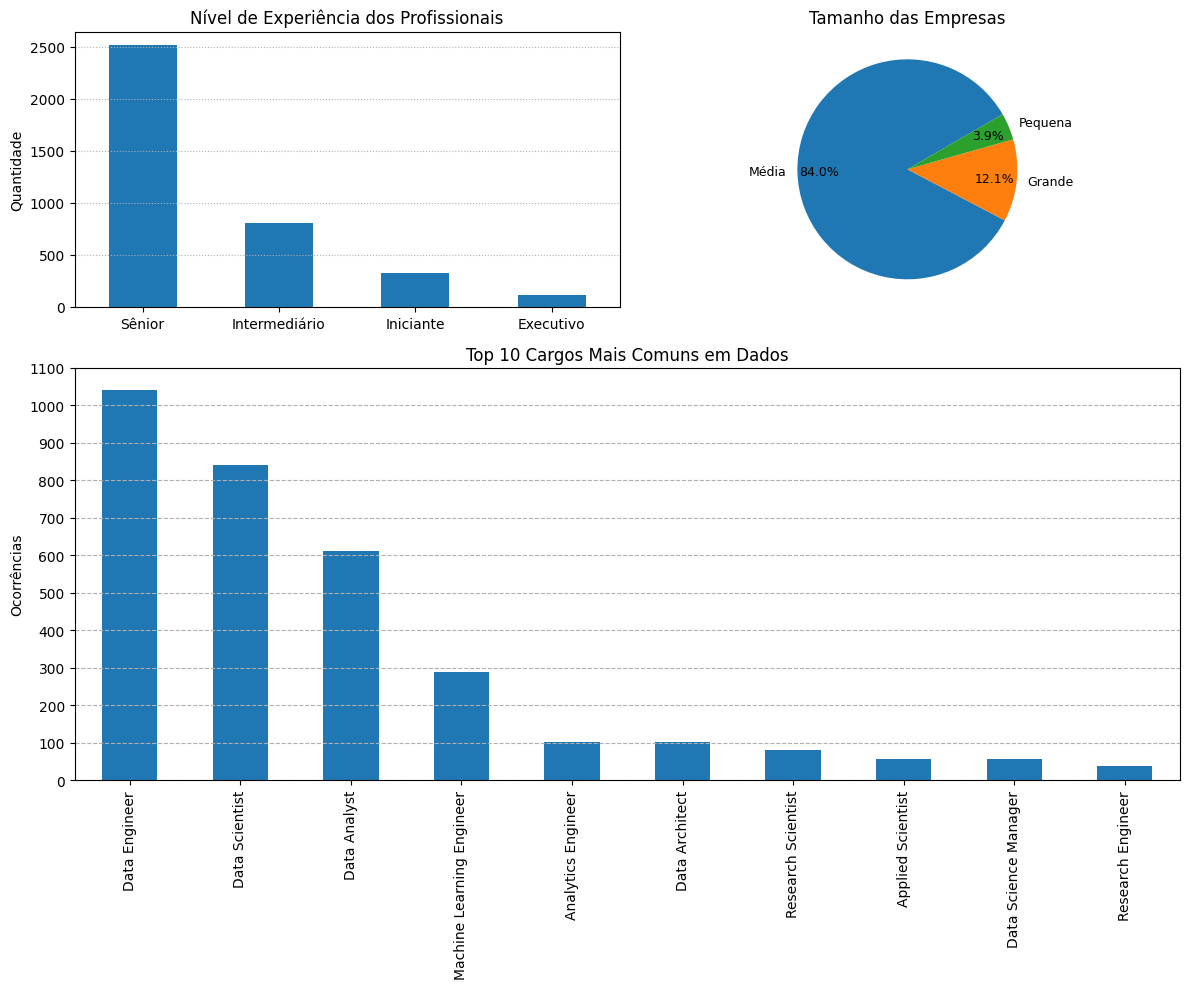

In [20]:
#Juntando os três gráficos, utilizei IA para criar a figura com os subplots
# Configuração da figura (2 linhas, 2 colunas)
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])  # Ajuste de proporção

# --- Gráfico 1: Experiência (topo esquerdo) ---
ax1 = fig.add_subplot(gs[0, 0])  # Linha 0, coluna 0
experiencia.plot(kind='bar', ax=ax1, color='#1f77b4')
ax1.set_title("Nível de Experiência dos Profissionais")
ax1.set_xlabel("")
ax1.set_ylabel("Quantidade")
ax1.set_xticks(range(4))
ax1.set_xticklabels(['Sênior', 'Intermediário', 'Iniciante', 'Executivo'], rotation=0)
ax1.grid(axis='y', linestyle=':')

# --- Gráfico 2: Pizza (topo direito) ---
ax2 = fig.add_subplot(gs[0, 1])  # Linha 0, coluna 1
empresa_proporcional.plot.pie(
    autopct="%.1f%%",
    labels=rotulo,
    ax=ax2,
    startangle=30,
    textprops={'fontsize': 9},
    pctdistance= 0.8
)
ax2.set_title("Tamanho das Empresas")
ax2.set_ylabel("")

# --- Gráfico 3: Cargos (base, largura total) ---
ax3 = fig.add_subplot(gs[1, :])  # Linha 1, todas as colunas
cargos_mais_comuns.plot(kind='bar', ax=ax3)
ax3.set_title("Top 10 Cargos Mais Comuns em Dados")
ax3.set_xlabel("")
ax3.set_ylabel("Ocorrências")
ax3.set_yticks(range(0, 1040 + 100, 100))
ax3.grid(axis='y', linestyle='--')

# Ajuste de layout
plt.tight_layout()
plt.show()

**# Fim da Etapa 02 "Frequência e Distribuição das Categorias"**



*   Primeiramente analisei quais são os 10 cargos mais comuns e criei um gráfico de barras para visualizar, desta análise pode se observar que os 3 primeiros cargos têm uma diferença abismal de cargos ocupados, para os demais, sendo responsáveis por mais de 65% dos cargos ocupados. Um dos motivos para isso na minha opinião, e cabe uma análise mais aprofundada, é que são justamente os três cargos mais divulgados em artigos,  publicações no linkedin, redes sociais e até mesmo em plataformas de cursos livres.
*   Partindo para a análise dos níveis de experiência, pode-se notar que quase 70% dos profissionais são Sêniores, o que para mim foi surpreendente, uma vez que, seguindo o conhecimento "popular" seria fácil acreditar que a maior parte dos cargos seria ocupada por Iniciantes e Intermediários. Isso pode ser fato, bem como um viés ocasionado pela Base de dados, que é composta por uma pequena parcela de empresas pequenas (como veremos a frente), empresas essas em que, cabe uma análise de correlação aqui, seria mais comum ver profissionais nos primeiros estágios da sua carreira.
*   Por fim, seguimos para a análise do tamanho das empresas, essa sim um pouco mais "fácil" de se chegar a algumas conclusões. Por exemplo, temos poucas empresas Grandes e muitas Médias, o que é comum de se esperar. O fato de se ter pouqíssimas empresas pequenas, se deve, provavelmente, por muitas destas empresas estarem em seus estágios iniciais ainda nem aparecerem no radar de quem montou a base, o que pode enviesar um pouco a análise.
*   Cabe um adendo que apesar de ter chegado a conclusões ainda são superficiais e tudo que eu concluí pode ser modificado conforme avance para análises mais complexas.
*   Os gráficos individuais foram feitos por mim, porém, cabe ressaltar que, o código para os subplots, feitos na visualização final do "Relatório", foi feito inteiramente por IA.





# Etapa 03 - Estatísticas Descritivas

In [21]:
#Verificando um panorama geral do salários em dólar
df_salarios['salary_in_usd'].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


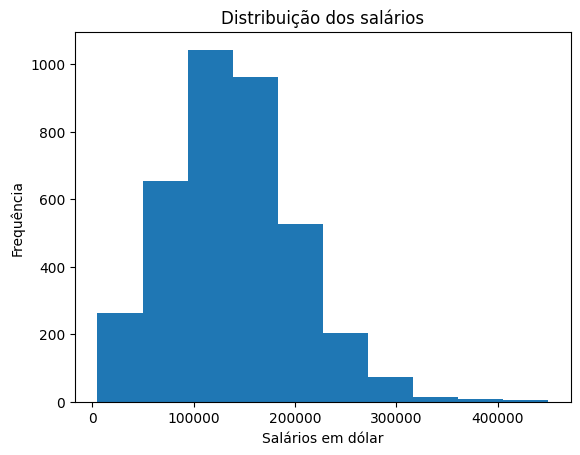

In [23]:
#Criando um histograma para verificar como os salários estão distribuídos
df_salarios['salary_in_usd'].hist()
plt.title("Distribuição dos salários")
plt.xlabel("Salários em dólar")
plt.ylabel("Frequência")
plt.grid(False)
plt.show()

In [24]:
#Analisando o salário em comparação com a experiência
salario_experiencia = df_salarios.groupby('experience_level')['salary_in_usd']
salario_experiencia.describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,320.0,78546.284375,52225.424309,5409.0,40000.0,70000.0,110009.25,300000.0
EX,114.0,194930.929825,70661.929661,15000.0,145000.0,196000.0,239000.00,416000.0
MI,805.0,104525.939130,54387.685128,5132.0,66837.0,100000.0,135000.00,450000.0
SE,2516.0,153051.071542,56896.263954,8000.0,115000.0,146000.0,185900.00,423834.0


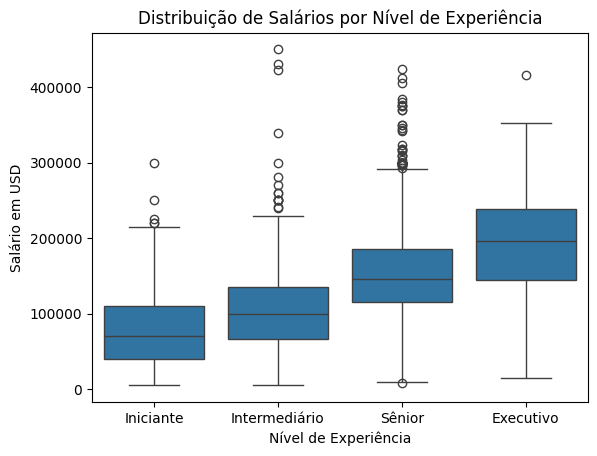

In [25]:
ordem_sal_exp= ['EN', 'MI', 'SE', 'EX']
sns.boxplot(data=df_salarios, x='experience_level', y='salary_in_usd',order=ordem_sal_exp)
plt.title('Distribuição de Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
label_sal_exp = ['Iniciante', 'Intermediário', 'Sênior', 'Executivo']
plt.xticks(ticks=[0,1,2,3], labels=label_sal_exp)
plt.show()

In [26]:
#Analisando o salário em comparação com o tamanho da empresa
salario_empresa = df_salarios.groupby('company_size')['salary_in_usd']
salario_empresa.describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,454.0,118300.982379,75832.391505,5409.0,60830.75,108500.0,159175.00,423834.0
M,3153.0,143130.548367,58992.813382,5132.0,102100.00,140000.0,180000.00,450000.0
S,148.0,78226.682432,61955.141792,5679.0,35668.00,62146.0,107481.75,416000.0


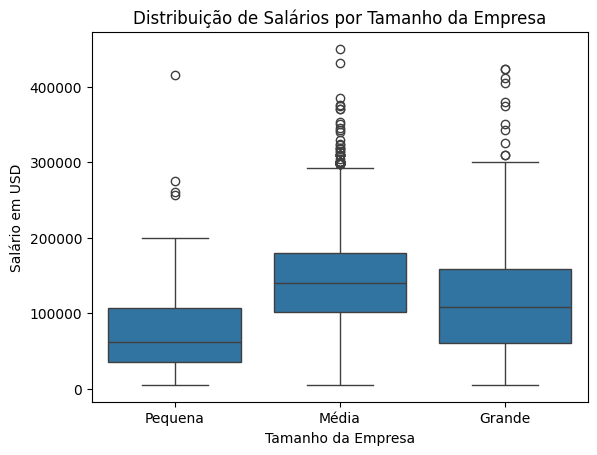

In [27]:
ordem_sal_emp= ['S', 'M', 'L']
sns.boxplot(data=df_salarios, x='company_size', y='salary_in_usd',order=ordem_sal_emp)
plt.title('Distribuição de Salários por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário em USD')
label_sal_emp = ['Pequena', 'Média', 'Grande']
plt.xticks(ticks=[0,1,2], labels=label_sal_emp)
plt.show()

In [28]:
#Analisando o salário em comparação com a região
salario_regiao = df_salarios.groupby('region')['salary_in_usd']
salario_regiao.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Africa,17.0,49515.235294,48943.705107,7000.0,15000.00,30469.0,54685.00,200000.0
Americas,3140.0,150915.876115,56609.917467,6270.0,112000.00,145000.0,185000.00,450000.0
Asia,120.0,50661.400000,60147.633575,5409.0,16367.50,30475.5,64033.25,423834.0
Europe,464.0,74852.359914,44103.410774,5132.0,47974.75,65929.0,91147.75,430967.0
Oceania,14.0,74881.500000,38634.485890,20000.0,45176.25,71684.0,83690.75,150000.0


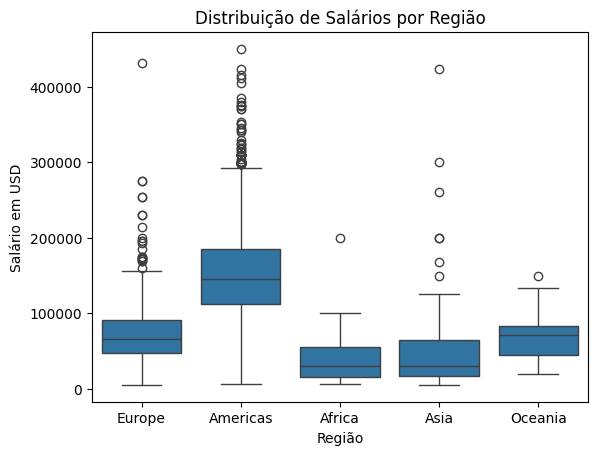

In [29]:
sns.boxplot(data=df_salarios, x='region', y='salary_in_usd')
plt.title('Distribuição de Salários por Região')
plt.xlabel('Região')
plt.ylabel('Salário em USD')
plt.show()

**# Fim da Etapa 03 "Estatísticas Descritivas"**


*   Inicialmente comecei a análise dando uma olhada nas medidas de tendência central (média, mediana e intervalo interquartil) e variação (desvio-padrão), usando o .describe(), após isso gerei um histograma e percebi que os dados de sálarios formam um distribuição muito próxima de uma distribuição normal, o que facilatará caso para o caso de análises mais complexas e inferenciais.
*   Depois verifiquei como se distribuiam os salários com três variáveis, Nível de Experiência, Tamanho da Compainha e Região, para isso fiz uso de boxplots que facilitaram muito a análise:


1.   Nível de Experiência: Esta análise foi a mais simples e consequentemente a menos surpreendente, uma vez que, seguindo o óbvio o iniciante ganha menos que o intermediário, que ganha menos que o sênior, que ganha menos que o executivo. Isso pode ser observado através da média e da mediana. Outros fatores a serem levados em conta é a presença de outliers que enviesam a análise principalmente para os níveis intermediário e sênior. Por fim, cabe ressaltar que a análise pode ser prejudicada pelo fato de que quase 70% dos dados são de profissionais sênior.

1.   Tamanho da Empresa: Esta análise foi um pouco mais surpreendente, pois, a partir da média e mediana pode-se notar uma tendência de empresas médias a pagar mais, apesar de que aos mesmos moldes da análise anterior, há a possibilidade de a análise ser prejudicada pelo fato de haver um grande número de empresas médias. Outro fato interessante destas empresas, é o de que o desvio padrão ser o menor dentre as três, caracterizando uma variação menor de salário para elas.
2.   Região: Por fim, analizar a região pode ser um pouco mais complicado, pois não sei quando estes dados foram coletados, mas partindo do pressuposto que foram recolhidos recentemente pode se notar uma diferença abismal das Américas para o resto do mundo, muito possivelmente puxada pelas Big Techs e pelo Vale do Silício, Europa com os seus grandes polos técnológicos e Oceania muito provavelmente puxada pela Austrália tem boas médias de sálario mas muito menores que a das Américas. Um detalhe a se observar é a diferença entra a média e a mediana da África e da Ásia, muito provavelmente devido a presença de outliers.

É sempre bom relembrar que as três análises podem ser afetadas devido a quantidade distribuída de dados, caso essa base seja fruto de uma amostragem estratificada, não há problemas, caso não há grandes chances de enviesamento.

# Etapa 04 - Comparações por País

In [30]:
#Verificando os top 10 países com as maiores médias salariais
paises = df_salarios.groupby('country')['salary_in_usd'].mean()
paises

,salary_in_usd
country,
Algeria,100000.000000
American Samoa,32777.500000
Argentina,35500.000000
Armenia,50000.000000
Australia,77980.545455
...,...
United Arab Emirates,100000.000000
United Kingdom of Great Britain and Northern Ireland,86988.323353
United States of America,152822.011651


In [31]:
top_10_paises = paises.sort_values(ascending=False).head(10)
top_10_paises

,salary_in_usd
country,
Israel,423834.000000
Malaysia,200000.000000
Puerto Rico,166000.000000
United States of America,152822.011651
Canada,132222.905882
China,125404.000000
New Zealand,125000.000000
Bosnia and Herzegovina,120000.000000
Ireland,114943.428571


In [32]:
#Observando os top 10 países com os menores salários
paises_10_menores = paises.sort_values(ascending=True).head(10)
paises_10_menores

,salary_in_usd
country,
North Macedonia,6304.0
Morocco,10000.0
Slovakia,12608.0
Indonesia,15000.0
"Moldova, Republic of",18000.0
Ghana,18500.0
Türkiye,19058.0
Costa Rica,20000.0
Honduras,20000.0


**# Fim da Etapa 04 "Comparações por País"**

Uma etapa mais simples do desafio mas importante para entender como os salários estão distribuídos a partir de um grau hierárquico menor. Um ponto interessante observado é que a média de salários dos EUA é muito similiar a média das Américas observada na etapa anterior. Tomei a liberdade de analisar rapidamente os 10 países com a menor média e surpreendentemente a Europa tem 2 países no top 3 que menos pagam.

# Etapa 05 - Correlações e Tendências

In [42]:
#Analisando correlaçções
quantitativas = df_salarios[['salary_in_usd', 'years_of_experience','work_year']]
quantitativas.corr()

,salary_in_usd,years_of_experience,work_year
salary_in_usd,1.000000,0.410723,0.228290
years_of_experience,0.410723,1.000000,0.178878
work_year,0.228290,0.178878,1.000000


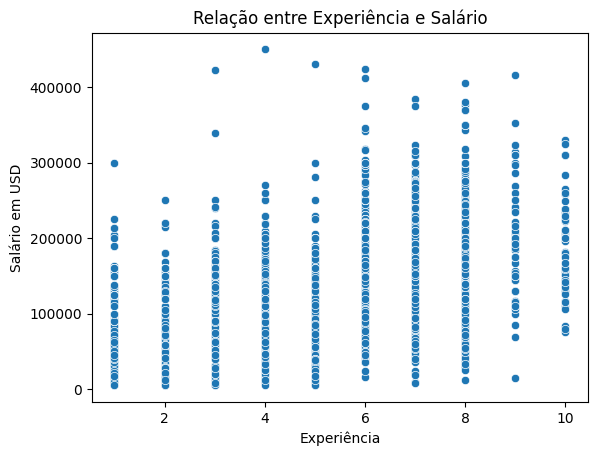

In [40]:
sns.scatterplot(df_salarios, x='years_of_experience', y='salary_in_usd')
plt.title('Relação entre Experiência e Salário')
plt.xlabel('Experiência')
plt.ylabel('Salário em USD')
plt.show()

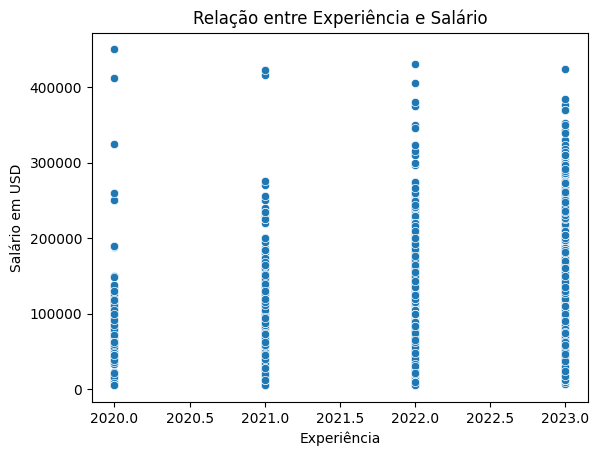

In [41]:
sns.scatterplot(df_salarios, x='work_year', y='salary_in_usd')
plt.title('Relação entre Ano e Salário')
plt.xlabel('Ano')
plt.ylabel('Salário em USD')
plt.show()

**# Fim da Etapa 05 "Correlações e Tendências"**
Nesta etapa foi possível notar que a correlação entre o salário e os anos de experiência e ano do trabalho é baixa, tanto observando a matriz de correlação como nos gráficos de dispersão gerados.